# Show the annotation of COCO format
Reference: https://towardsdatascience.com/master-the-coco-dataset-for-semantic-image-segmentation-part-1-of-2-732712631047

In [1]:
import cv2
import numpy as np
import os
import random
import skimage.io as io
from pycocotools.coco import COCO

### For visualizing the outputs ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline




In [2]:
annFile = "/ldap_home/jincheng.lyu/project/SOLO/tools/convert_datasets/instances_train.json"
coco = COCO(annFile)

loading annotations into memory...
Done (t=2.07s)
creating index...
index created!


In [17]:
# Define the classes (out of the 81) which you want to see. Others will not be shown.
# filterClasses = ['Air conditioner', 'Watches', 'Biscuit', 'Rope']
filterClasses = ['Rope']

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 

# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

Number of images containing all the  classes: 164


In [18]:
dataDir = "/ldap_home/jincheng.lyu/data/product_segmentation/synthetics_cocoformat/train/"

# load and display a random image
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img

{'id': 21488,
 'file_name': 'ad4bc7722f03f05f736842cc16f44f55.png',
 'width': 500,
 'height': 500,
 'date_captured': '2021-07-13 09:16:44.846632',
 'license': 1,
 'coco_url': '',
 'flickr_url': ''}

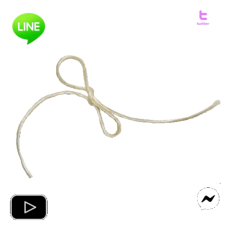

In [19]:
I = io.imread('{}/{}'.format(dataDir, img['file_name']))/255.0

plt.axis('off')
plt.imshow(I[:,:,:3])
plt.show()

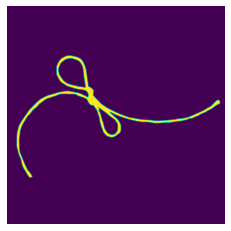

In [21]:
# Display instance mask from alpha channel
plt.axis('off')
plt.imshow(I[:,:,-1])
plt.show()

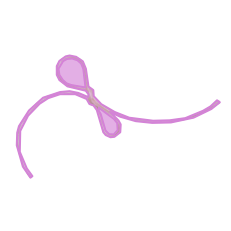

In [20]:
# Load and display instance annotations
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

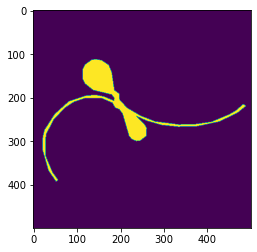

In [22]:
#### GENERATE A BINARY MASK ####
mask = np.zeros((img['height'],img['width']))
for i in range(len(anns)):
    mask = np.maximum(coco.annToMask(anns[i]), mask)
plt.imshow(mask)